#  Gaussian Mixture Models for generating new faces

Training a Gaussian mixture model on the Olivetti faces dataset.

First get the olivetti data sets.

In [1]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/ziyang/scikit_learn_data


In [3]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

In [4]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

## 1. Train a Gaussian mixture model on the Olivetti faces dataset. If you are training on your local system, you can use the dataset as is. But if you are using Google Colab, you will have to reduce your data, otherwise, your RAM will crash. For now, we will provide you with the code for PCA dimensionality reduction. You can use the provided code for that part.

Step 1: Shuffle and split the data to have a better distribution using StratifiedShuffleSplit. Split the data to train set, test set and validation set.

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data,
                                                   olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [6]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


this part is to avoid overflow of your RAM, ignore it for now. you will learn more about them on next lecture.

In [7]:
from sklearn.decomposition import PCA

pca = PCA(0.97)
X_train_reduced = pca.fit_transform(X_train)
X_valid_reduced = pca.transform(X_valid)
X_test_reduced = pca.transform(X_test)

Using the GaussianMixture of sklearn, and with 20 number of components, train a gaussian mixture model on your data.

(set your random state to 42 for reproducibility and you can use the X_train_reduced from the previous part)


In [11]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, random_state=42)
gm.fit(X_train_reduced)
y_pred = gm.predict(X_test_reduced)

## 2. Generate 30 new faces by sampling from your model and visualize them.

In [12]:
n_generated_faces = 30
generated_faces_reduced_format, y_gen_faces = gm.sample(n_generated_faces)


Now just run this line:D
since your results are in reduced format, you have to use the inverse transform.

In [13]:
generated_faces = pca.inverse_transform(generated_faces_reduced_format)

plot your generated faces. you can use the provided function for it.

In [14]:
import matplotlib.pyplot as plt

def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape((faces.shape[0], 64, 64)) #---- fill here: Turn your results to picture format by reshaping it
                      # you are supposed to check the original dataset and
                      # figure out what was the resolution of the original images
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

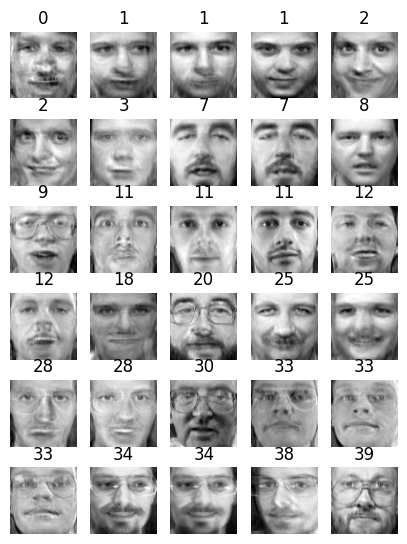

In [15]:
plot_faces(generated_faces, y_gen_faces)

## 3. Take the first 5 images of your dataset and create 15 changed images. The first five(changed) images must be rotated 90 degrees counterclockwise. The second five (changed) images must beflipped. The third five images must be darker than the original images (multiply their channels by 0.3.)

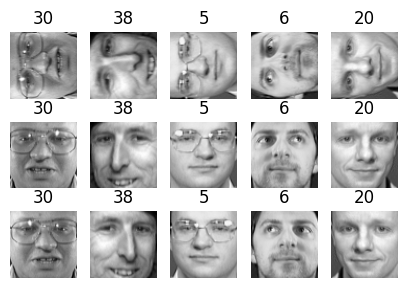

In [16]:
import numpy as np
n_rotated = 5
rotated = np.rot90(X_train[:n_rotated].reshape(-1, 64, 64), k=1, axes=(1, 2))
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 5
flipped = np.flip(X_train[:n_flipped].reshape(-1, 64, 64), axis=2)
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 5
darkened = X_train[:n_darkened].copy()
darkened = (darkened * 0.3).reshape(-1, 64 * 64)
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

## 4. Compute the log-likelihood of each sample. (you can use the gm methods.) Compare these log-likelihoods with the main data scores (maybe for the first 15 samples). Explain the results and describe how we use GMMs for anomaly detection.

Run the following code before next parts:D

In [17]:
X_bad_faces_pca = pca.transform(X_bad_faces)

In [18]:
# --- fill here
# Compute the log-likelihood of each sample
log_likelihood_bad_faces = gm.score_samples(X_bad_faces_pca)

# Compute the log-likelihood for the first 15 samples of the main data
X_main_pca = pca.transform(X_train[:15])
log_likelihood_main_faces = gm.score_samples(X_main_pca)

In [19]:
# --- fill here
# Print the log-likelihoods
print("Log-likelihoods of manipulated faces:")
print(log_likelihood_bad_faces)

print("\nLog-likelihoods of main faces:")
print(log_likelihood_main_faces)

# Explanation of how GMMs are used for anomaly detection
print("\nExplanation:")
print("""
Gaussian Mixture Models (GMMs) are used for anomaly detection by modeling the distribution of normal data.
A GMM is trained on the normal data to learn the distribution. The log-likelihood of a sample under this model
indicates how well the sample fits the distribution of the normal data. Samples with low log-likelihoods are considered
anomalies because they do not fit well within the learned distribution. In this example, we compare the log-likelihoods
of manipulated (anomalous) faces with the log-likelihoods of main (normal) faces. If the manipulated faces have 
significantly lower log-likelihoods, they can be considered anomalies.
""")

Log-likelihoods of manipulated faces:
[-28987130.57062301 -26934362.95605109 -27108664.91721749
 -28275178.31383901 -24562512.03381907 -28475838.0783876
  -6594988.11553478  -9180625.98540227 -16169983.89777877
  -6182153.67283135 -82194971.34914364 -93600731.80881721
 -48653537.72032939 -59292373.18029471 -76789883.6895897 ]

Log-likelihoods of main faces:
[791.96172329 699.35857271 777.48090065 799.53999711 697.89389269
 791.61711869 728.22253379 697.89390219 684.3311696  756.55251986
 697.89391544 739.26667294 731.75890129 791.24117799 684.33120225]

Explanation:

Gaussian Mixture Models (GMMs) are used for anomaly detection by modeling the distribution of normal data.
A GMM is trained on the normal data to learn the distribution. The log-likelihood of a sample under this model
indicates how well the sample fits the distribution of the normal data. Samples with low log-likelihoods are considered
anomalies because they do not fit well within the learned distribution. In this example,